In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
v_sample=62.5e6/10
del_t=1/(v_sample)

In [51]:
plt.rcParams['mathtext.fontset'],plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 12})

In [75]:
data=pd.read_csv('final_data.csv')
time=data['Unnamed: 0']*del_t
data['Unnamed: 0']
time

0        0.000000e+00
1        1.600000e-07
2        3.200000e-07
3        4.800000e-07
4        6.400000e-07
             ...     
15995    2.559200e-03
15996    2.559360e-03
15997    2.559520e-03
15998    2.559680e-03
15999    2.559840e-03
Name: Unnamed: 0, Length: 16000, dtype: float64

In [76]:
data

,Unnamed: 0,0.625 MHz,1.25 MHz,1.875 MHz,2.5 MHz,3.125 MHz,3.75 MHz,4.375 MHz,5 MHz,5.625 MHz,6.25 MHz
0,0,6912,-9984,-5888,11264,-10496,-4096,-15360,7680,1536,12800
1,1,14080,-15360,-12544,-2304,10496,-5888,7936,15360,10240,12800
2,2,16128,512,13568,-7680,-10496,13312,10496,2048,15104,12800
3,3,11776,15616,4096,14592,10496,-15872,-14592,-14080,14080,12800
4,4,3072,8960,-16128,-15872,-10496,12288,-1536,-10752,7680,12800
...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,-12800,-15872,14592,14848,-11008,2048,15872,10240,15360,14848
15996,15996,-16128,-2304,-11008,-8448,11008,7680,-3584,-8192,11008,14848
15997,15997,-13312,14592,-7936,-1280,-11008,-14336,-13568,-15360,2304,14848
15998,15998,-5376,11264,15872,10496,11008,15616,12032,-1280,-7168,14848


In [77]:
data['2.5 MHz'][379:385]

379   -16128
380    13824
381    -6144
382    -3840
383    12288
384   -16128
Name: 2.5 MHz, dtype: int64

5.2

Text(0.5, 0, 'Time(s)')

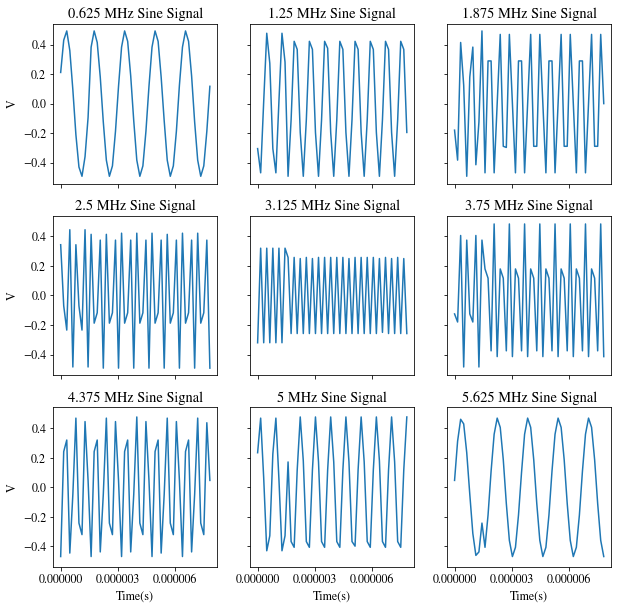

In [78]:
fig, axs = plt.subplots(3, 3,sharey=True,sharex=True,figsize=(10,10))
axs[0,0].set_ylabel('V')
axs[1,0].set_ylabel('V')
axs[2,0].set_ylabel('V')
axs[0,0].plot(time[:50],data['0.625 MHz'][:50]/(2**15))
axs[0,0].set_title('0.625 MHz Sine Signal')
axs[0,1].plot(time[:50],data['1.25 MHz'][:50]/(2**15))
axs[0,1].set_title('1.25 MHz Sine Signal')
axs[0,2].plot(time[:50],data['1.875 MHz'][:50]/(2**15))
axs[0,2].set_title('1.875 MHz Sine Signal')
axs[1,0].plot(time[:50],data['2.5 MHz'][:50]/(2**15))
axs[1,0].set_title('2.5 MHz Sine Signal')
axs[1,1].plot(time[:50],data['3.125 MHz'][:50]/(2**15))
axs[1,1].set_title('3.125 MHz Sine Signal')
axs[1,2].plot(time[:50],data['3.75 MHz'][:50]/(2**15))
axs[1,2].set_title('3.75 MHz Sine Signal')
axs[2,0].plot(time[:50],data['4.375 MHz'][:50]/(2**15))
axs[2,0].set_title('4.375 MHz Sine Signal')
axs[2,1].plot(time[:50],data['5 MHz'][:50]/(2**15))
axs[2,1].set_title('5 MHz Sine Signal')
axs[2,2].plot(time[:50],data['5.625 MHz'][:50]/(2**15))
axs[2,2].set_title('5.625 MHz Sine Signal')
axs[2,0].xaxis.set_major_locator(plt.MaxNLocator(3))
axs[2,0].set_xlabel('Time(s)')
axs[2,1].set_xlabel('Time(s)')
axs[2,2].set_xlabel('Time(s)')


In [11]:
x=np.fft.fftfreq(16000,del_t)
x_new=np.fft.fftshift(x)
x_new
plt.plot(x_new/1e6,np.fft.fftshift(np.fft.fft((data['0.625 MHz'])).imag))


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

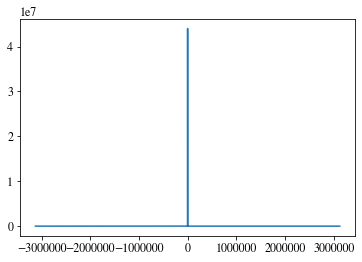

In [80]:
E1=np.fft.fftshift(np.fft.fft((data['0.625 MHz']/2**15)))
P1=np.abs(E1)**2
E2=np.fft.fftshift(np.fft.fft((data['1.25 MHz']/2**15)))
P2=np.abs(E2)**2
E3=np.fft.fftshift(np.fft.fft((data['1.875 MHz']/2**15)))
P3=np.abs(E3)**2
E4=np.fft.fftshift(np.fft.fft((data['2.5 MHz']/2**15)))
P4=np.abs(E4)**2
E5=np.fft.fftshift(np.fft.fft((data['3.125 MHz']/2**15)))
P5=np.abs(E5)**2
E6=np.fft.fftshift(np.fft.fft((data['3.75 MHz']/2**15)))
P6=np.abs(E6)**2
E7=np.fft.fftshift(np.fft.fft((data['4.375 MHz']/2**15)))
P7=np.abs(E7)**2
E8=np.fft.fftshift(np.fft.fft((data['5 MHz']/2**15)))
P8=np.abs(E8)**2
E9=np.fft.fftshift(np.fft.fft((data['5.625 MHz']/2**15)))
P9=np.abs(E9)**2
E10=np.fft.fftshift(np.fft.fft((data['6.25 MHz']/2**15)))
P10=np.abs(E10)**2
plt.plot(x_new,P10)

Text(0.5, 0, 'Frequency(MHz)')

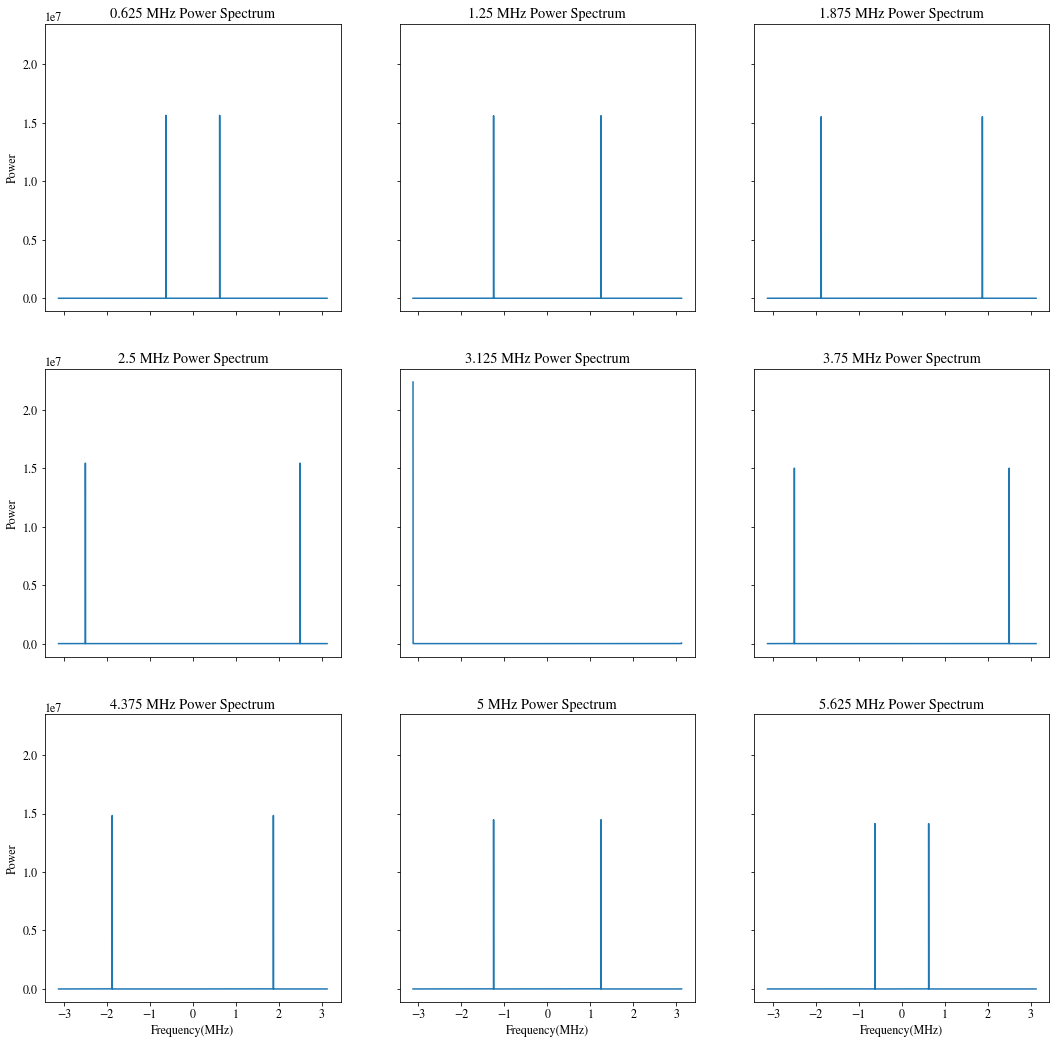

In [81]:
import ugradio

fig, axs = plt.subplots(3, 3,sharey=True,sharex=True,figsize=(18,18))

axs[0,0].set_ylabel('Power')
axs[1,0].set_ylabel('Power')
axs[2,0].set_ylabel('Power')
axs[0,0].plot(x_new/1e6,P1)
axs[0,0].set_title('0.625 MHz Power Spectrum')
axs[0,1].plot(x_new/1e6,P2)
axs[0,1].set_title('1.25 MHz Power Spectrum')
axs[0,2].plot(x_new/1e6,P3)
axs[0,2].set_title('1.875 MHz Power Spectrum')
axs[1,0].plot(x_new/1e6,P4)
axs[1,0].set_title('2.5 MHz Power Spectrum')
axs[1,1].plot(x_new/1e6,P5)
axs[1,1].set_title('3.125 MHz Power Spectrum')
axs[1,2].plot(x_new/1e6,P6)
axs[1,2].set_title('3.75 MHz Power Spectrum')
axs[2,0].plot(x_new/1e6,P7)
axs[2,0].set_title('4.375 MHz Power Spectrum')
axs[2,1].plot(x_new/1e6,P8)
axs[2,1].set_title('5 MHz Power Spectrum')
axs[2,2].plot(x_new/1e6,P9)
axs[2,2].set_title('5.625 MHz Power Spectrum')
axs[2,0].set_xlabel('Frequency(MHz)')
axs[2,1].set_xlabel('Frequency(MHz)')
axs[2,2].set_xlabel('Frequency(MHz)')


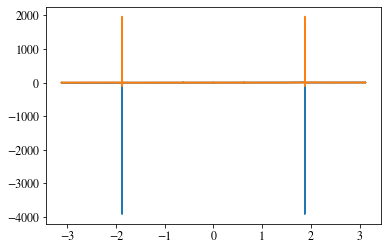

In [82]:
plt.plot(x/1e6,E2)
plt.plot(x/1e6,E8)

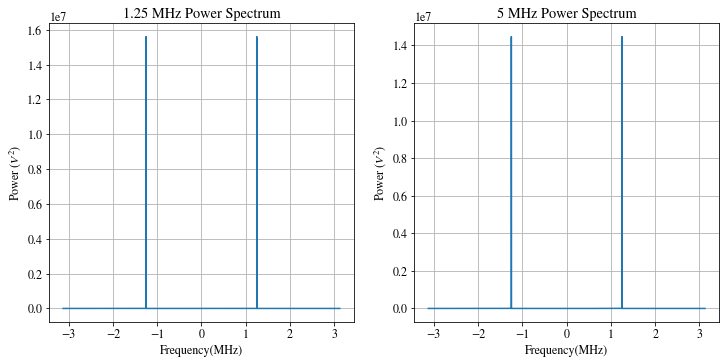

In [83]:
fig, axs = plt.subplots(1, 2,figsize=(12,5.5))
axs[0].plot(x_new/1e6,P2)
axs[1].plot(x_new/1e6,P8)
axs[0].set_xlabel('Frequency(MHz)')
axs[0].set_title('1.25 MHz Power Spectrum')
axs[1].set_title('5 MHz Power Spectrum')
axs[0].set_ylabel('Power ($V^{2}$)')
axs[1].set_ylabel('Power ($V^{2}$)')
axs[1].set_xlabel('Frequency(MHz)')
axs[0].grid()
axs[1].grid()
axs[0].locator_params(axis="x", nbins=10)
axs[1].locator_params(axis="x", nbins=10)


5.3

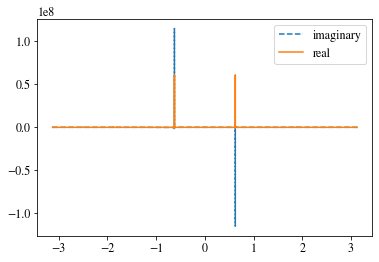

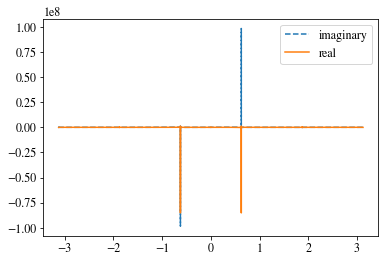

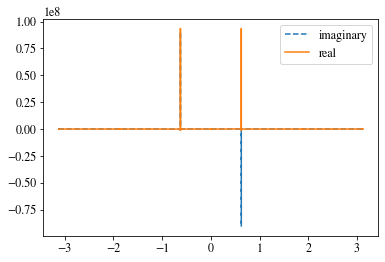

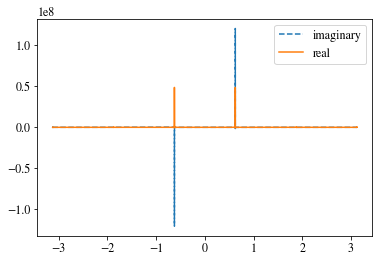

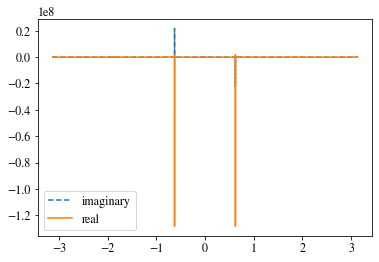

<Figure size 432x288 with 0 Axes>

In [84]:
data=np.load('0.1_nu_s_realizations (2).npy')
for i in range(5):
    plt.plot(x_new/1e6,np.fft.fftshift((np.fft.fft(data[i,:]).imag)),label='imaginary',linestyle='dashed')
    plt.plot(x_new/1e6,np.fft.fftshift(np.fft.fft(data[i,:]).real),label='real')
    plt.legend()
    plt.figure()


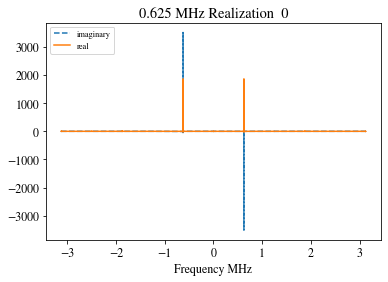

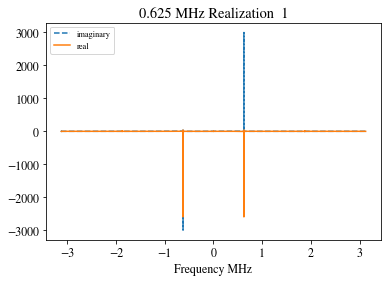

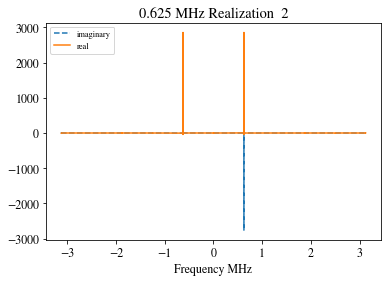

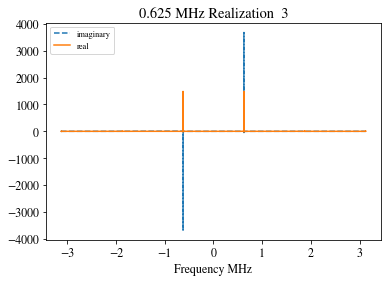

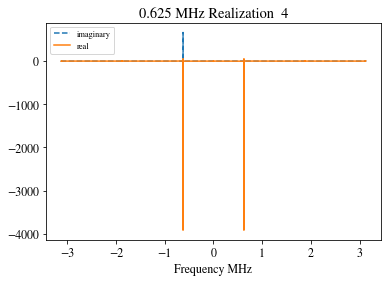

In [85]:
data=np.load('0.1_nu_s_realizations (2).npy')
for i in range(5):
    plt.figure(figsize=(6,4))
    plt.plot(x_new/1e6,np.fft.fftshift((np.fft.fft(data[i,:]).imag)/2**15),label='imaginary',linestyle='dashed')
    plt.plot(x_new/1e6,np.fft.fftshift(np.fft.fft(data[i,:]).real)/2**15,label='real')
    plt.legend(loc='upper left',fontsize='x-small')
    plt.xlabel('Frequency MHz')
    plt.title('0.625 MHz Realization{0:3.0f}'.format(i))


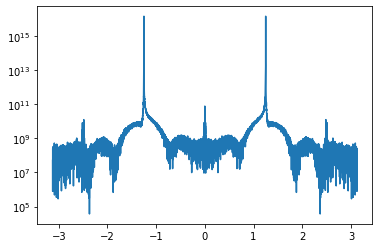

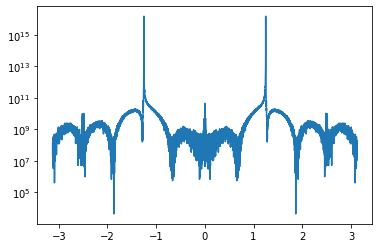

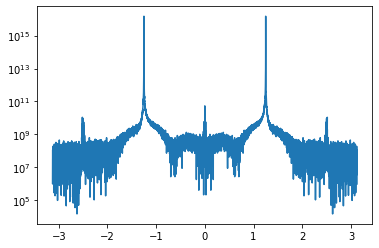

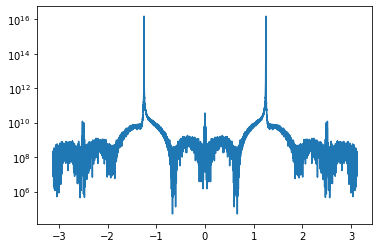

<Figure size 432x288 with 0 Axes>

In [12]:
data=np.load('0.8_nu_s_realizations.npy')

for i in range(4):
    plt.semilogy(x_new/1e6,np.abs(np.fft.fftshift((np.fft.fft(data[i,:]))))**2)
    plt.figure()
    

In [10]:
ugradio.dft.idft?

Object `ugradio.dft.idft` not found.


In [196]:
Fourier=np.fft.fft(data[0,:]/2**15)
Power=np.abs(Fourier)**2
inv=ugradio.dft.idft(Power)
inv

(array([-8000., -7999., -7998., ...,  7997.,  7998.,  7999.]),
 array([ 1748.7142334 -3.23489624e-09j,  -540.38232422+9.98738869e-10j,
        -1414.72967529+1.30853550e-09j, ...,
         1414.72650146+1.30899025e-09j, -1414.72967529-1.30853550e-09j,
         -540.38232422-9.98738869e-10j]))

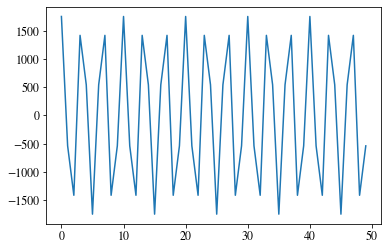

In [197]:
plt.plot(inv[1][0:50])

In [15]:
import ugradio
print("Zero Padding:")
data_padded = np.zeros(len(data[0,:]) + 4000)
data_padded[6000:14000] = data[0,4000:12000]


print("Calculating ACF with DFT/np.FFT Manually")
FFT_0p1 = ugradio.dft.dft(data_padded/(2**15))
ACS_dft = ugradio.dft.idft(np.abs(FFT_0p1[1])**2, f=FFT_0p1[0])
ACS_nft = np.fft.fftshift(np.fft.ifft(np.abs(np.fft.fft(data_padded/(2**15)))**2))

Zero Padding:
Calculating ACF with DFT/np.FFT Manually


In [16]:
print("Calculating ACF with np.correlate & scipy.correlate")
import scipy.signal as sig

ACS_np = np.correlate(data_padded/(2**15),data_padded/(2**15), mode='same')
ACS_scipy = sig.correlate(data_padded/(2**15),data_padded/(2**15), mode="same")

Calculating ACF with np.correlate & scipy.correlate


In [17]:
ACS_nft

array([-4.65661287e-14-4.41630131e-14j,  3.20142135e-14+4.82630486e-15j,
        9.31322575e-14-1.26756091e-15j, ...,
        1.39698386e-13-1.97672859e-14j,  6.98491931e-14-2.57596285e-14j,
       -1.39698386e-13-3.25718630e-15j])

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


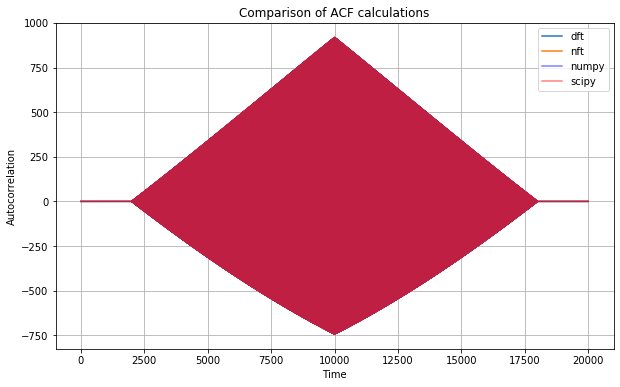

In [18]:
# np.shape(Auto_C_dft)
plt.figure(figsize=(10,6))
plt.title('Comparison of ACF calculations')
plt.plot(ACS_dft[1], label="dft")
#plt.plot(New)
plt.plot( ACS_nft, label="nft")
plt.plot(ACS_np, color="blue", alpha=0.5, label="numpy")
plt.plot(ACS_scipy,color="red", alpha=0.5, label="scipy")
plt.ylabel('Autocorrelation')
plt.xlabel('Time')
plt.grid()
# plt.xlim(3500,5100)
plt.legend()
# plt.xlim(-100,100)

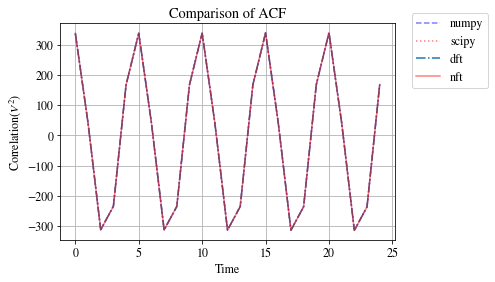

In [55]:
plt.plot(ACS_np[5000:5025], color="blue", alpha=0.5, label="numpy",linestyle='dashed')
plt.plot(ACS_scipy[5000:5025],color="red", alpha=0.5, label="scipy",linestyle='dotted')
plt.plot(ACS_dft[1][5000:5025], label="dft",linestyle='dashdot')
plt.plot( ACS_nft[5000:5025], label="nft",linestyle='solid',color='red',alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Correlation($V^{2}$)')
plt.title('Comparison of ACF')
plt.legend(loc=(1.05,0.7))
plt.grid()

5.4

In [87]:
#ugradio.dft??
import ugradio

In [30]:
vs=6.25e6
vsamp=6.25e6
N=16000
Power1=ugradio.dft.dft(data[0,:]/2**15,t = np.linspace(-N/(2.0*vs),N/(2.0*vs),num=16000,endpoint=False),f=np.linspace(-vsamp/2.,vsamp/2.,num=30000,endpoint=False),vsamp=6.25e6)

TypeError: '(0, slice(None, None, None))' is an invalid key

In [ ]:
Power1

In [ ]:
power=np.abs(Power1[1])**2
plt.plot(Power1[0]/1e6,Power1[1])
plt.xlim(-1.5,-1)
plt.ylim(-10,100)


In [88]:
data=pd.read_csv('final_data.csv')


Text(0, 0.5, 'Power(V^2)')

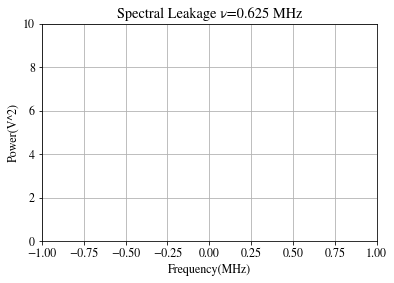

In [108]:
Fourier=Fourier=ugradio.dft.dft(data['0.625 MHz']/2**15,t = np.linspace(-N/(2.0*vs),N/(2.0*vs),num=16000,endpoint=False),f=np.linspace(-vsamp/2.,vsamp/2.,num=100000,endpoint=False),vsamp=6.25e6)
Power=np.abs(Fourier[1])**2
plt.plot(Fourier[0],Power)
plt.grid()
plt.ylim(0,10)
plt.xlim(-1,1)
plt.title('Spectral Leakage ν=0.625 MHz')
plt.xlabel('Frequency(MHz)')
plt.ylabel('Power(V^2)')

In [190]:
np.save('Power_100k_samples.npy',Power)

In [189]:
np.save('Fourier_100k_samples.npy',Fourier)

In [56]:
Fourier=np.load('Fourier_100k_samples.npy')
Power=np.load('Power_100k_samples.npy')

Text(0.5, 1.0, 'Spectral Leakage')

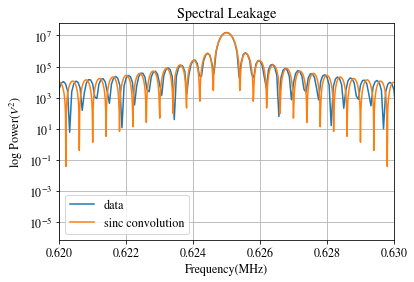

In [63]:
plt.semilogy(Fourier[0]/1e6,Power,label='data')
x=np.linspace(0.62,0.63,850)
plt.semilogy(x,1.5e7*np.sinc((x-0.625)*2500)**2,label='sinc convolution')
plt.xlim(0.62,0.63)
plt.grid()
plt.legend()
plt.ylabel('log Power($V^{2}$)')
plt.xlabel('Frequency(MHz)')
plt.title('Spectral Leakage')


(0.62, 0.63)

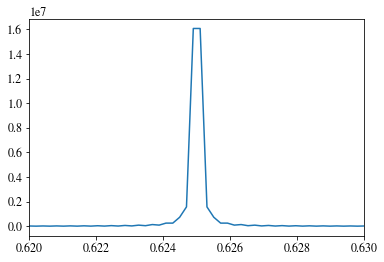

In [159]:
x=np.linspace(0.62,0.63)
plt.plot(x,2e7*np.sinc((x-0.625)*2500)**2)
plt.xlim(0.62,0.63)


5.5

In [64]:

N=16000
vs=6.25e6
vsamp=6.25e6
import ugradio
data=np.load('thousandth.npy')
Fourier=ugradio.dft.dft(data[0,:][0,:]/2**15,t = np.linspace(-N/(2.0*vs),N/(2.0*vs),num=16000,endpoint=False),f=np.linspace(-vsamp/2.,vsamp/2.,num=16000,endpoint=False),vsamp=6.25e6)

Fourier1=ugradio.dft.dft(data[0,:][0,:]/2**15,t = np.linspace(-N/(2.0*vs),N/(2.0*vs),num=16000,endpoint=False),f=np.linspace(-vsamp/2.,vsamp/2.,num=50000,endpoint=False),vsamp=6.25e6)

KeyboardInterrupt: 

In [ ]:
Fourier1=

Text(0.5, 1.0, 'Investigating Frequency Resolution')

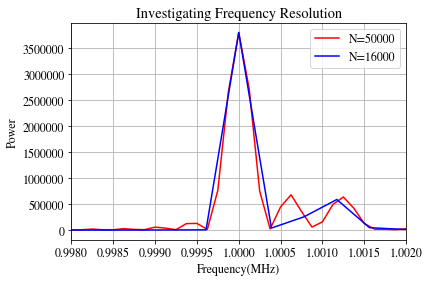

In [68]:
#plt.plot(Fourier[0]/1e6,np.abs(Fourier[1])**2)
plt.xlim(0.998,1.002)
plt.plot(Fourier1[0]/1e6,np.abs(Fourier1[1]**2),color='r',label='N=50000')
plt.plot(Fourier[0]/1e6,np.abs(Fourier[1]**2),color='b',label='N=16000')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('Frequency(MHz)')
plt.ylabel('Power')
plt.title('Investigating Frequency Resolution')

##### 5.6

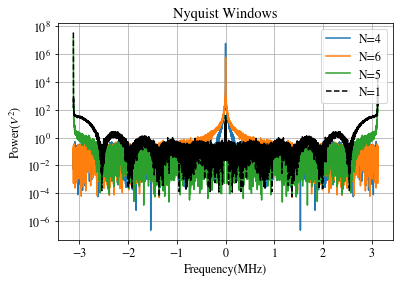

In [65]:
data4=np.load('nyquist_window_4.npy')
data5=np.load('nyquist_window_5.npy')
data6=np.load('nyquist_window_6.npy')
data1=np.load('nyquist_window_1.npy')
Fourier4=np.fft.fftshift(np.fft.fft(data4[:,0]/2**15))
Fourier6=np.fft.fftshift(np.fft.fft(data6[:,0]/2**15))
Fourier5=np.fft.fftshift(np.fft.fft(data5[:,0]/2**15))
Fourier1=np.fft.fftshift(np.fft.fft(data1[:,0]/2**15))
plt.semilogy(x_new/1e6,abs(Fourier4[0])**2,label='N=4')
plt.semilogy(x_new/1e6,abs(Fourier6[0]**2),label='N=6')
plt.semilogy(x_new/1e6,abs(Fourier5[0]**2),label='N=5')
plt.semilogy(x_new/1e6,abs(Fourier1[0]**2),label='N=1',color='black',linestyle='dashed')
plt.grid()
plt.legend()
plt.title('Nyquist Windows')
plt.xlabel('Frequency(MHz)')
plt.ylabel('Power($V^2$)')
plt.locator_params(axis="x", nbins=10)


##### 5.7

In [66]:
import numpy as np
import matplotlib.pyplot as plt
def gaussian(x,A,mu,sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

Text(0, 0.5, 'Counts')

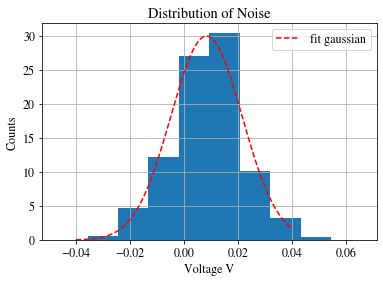

In [76]:
data=np.load('blocks_100.npy')
block_1=data[0][:,0]
blocks=np.empty(0)
for i in range(100):
    blocks=np.append(blocks,np.average(data*1000/2**15,axis=1))
plt.hist(blocks,density=True)
mean=np.mean(blocks)
SD=np.std(blocks)
x_lin=np.linspace(-0.04,0.04,1000)
G=gaussian(x_lin,30,mean,SD)
plt.plot(x_lin,G,color='r',linestyle='--',label='fit gaussian')
plt.title('Distribution of Noise')
plt.xlabel('Voltage V')
plt.grid()
plt.legend()
plt.ylabel('Counts')

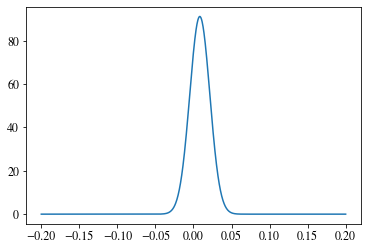

In [77]:
A=8
x_lin=np.linspace(-0.2,0.2,1000)
G=gaussian(x_lin,91.24,mean,SD)
plt.plot(x_lin,G)

In [78]:
avg=np.average(data/2**15,axis=1)


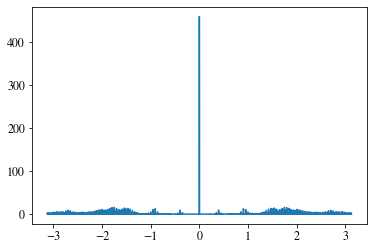

In [79]:
avg_array=np.empty((16000,100))
for i in range(len(data[0,:])):
    Fourier=np.fft.fftshift(np.fft.fft(data[0,:][i,:]/2**15))
    Power=np.abs(Fourier)**2
    #plt.plot(x_new/1e6,Power)
    avg_array[:,i]=np.abs(np.fft.fftshift(np.fft.fft(data[0,:][i,:]/2**15))**2)
Mean=np.mean(avg_array,axis=1)
plt.plot(x_new/1e6,np.mean(avg_array,axis=1))


Text(0, 0.5, 'Power($V^{2}$)')

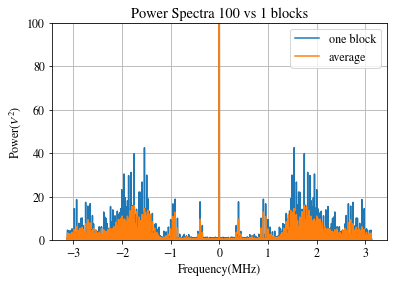

In [82]:
Fourier_one=np.fft.fftshift(np.fft.fft(data[:,0][0,:]/2**15))
plt.plot(x_new/1e6,np.abs(Fourier_one)**2,label='one block')
plt.plot(x_new/1e6,np.mean(avg_array,axis=1),label='average')
plt.grid()
plt.legend()
plt.ylim(0,100)
plt.xlabel('Frequency(MHz)')
plt.title('Power Spectra 100 vs 1 blocks')
plt.ylabel('Power($V^{2}$)')

(0, 2000)

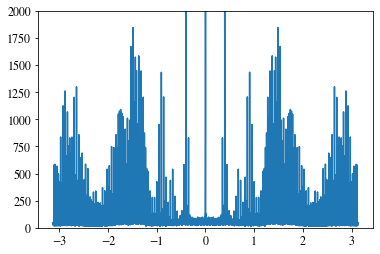

In [98]:
data4=np.load('blocks_16.npy')
avg_array=np.empty((16000,16))
for i in range(16):
    Fourier=np.fft.fftshift(np.fft.fft(data4[0,:][i,:]/2**15))
    Power=np.abs(Fourier)**2
    #plt.plot(x_new/1e6,Power)
    avg_array[:,i]=np.abs(np.fft.fftshift(np.fft.fft(data4[0,:][i,:]/2**15))**2)
Mean=np.mean(avg_array,axis=1)
plt.plot(x_new/1e6,np.mean(avg_array,axis=1))
plt.ylim(0,2000)


(0, 6000)

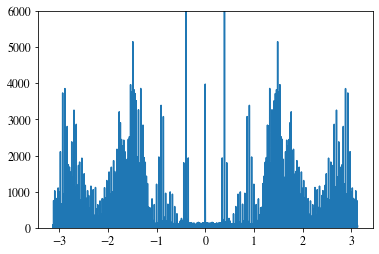

In [49]:
data2=np.load('blocks_4.npy')
avg_array=np.empty((16000,4))
for i in range(4):
    Fourier=np.fft.fftshift(np.fft.fft(data2[0,:][i,:]/2**15))
    Power=np.abs(Fourier)**2
    #plt.plot(x_new/1e6,Power)
    avg_array[:,i]=np.abs(np.fft.fftshift(np.fft.fft(data2[0,:][i,:]/2**15))**2)
Mean=np.mean(avg_array,axis=1)
plt.plot(x_new/1e6,np.mean(avg_array,axis=1))
plt.ylim(0,6000)

(0, 6000)

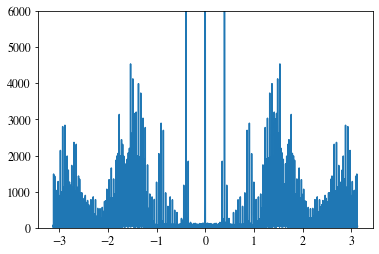

In [100]:
data2=np.load('blocks_8.npy')
avg_array=np.empty((16000,8))
for i in range(8):
    Fourier=np.fft.fftshift(np.fft.fft(data2[0,:][i,:]/2**15))
    Power=np.abs(Fourier)**2
    #plt.plot(x_new/1e6,Power)
    avg_array[:,i]=np.abs(np.fft.fftshift(np.fft.fft(data2[0,:][i,:]/2**15))**2)
Mean=np.mean(avg_array,axis=1)
plt.plot(x_new/1e6,np.mean(avg_array,axis=1))
plt.ylim(0,6000)

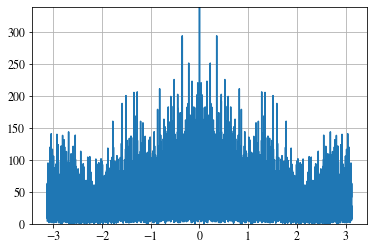

In [99]:
data2=np.load('blocks_2.npy')
avg_array=np.empty((16000,2))
for i in range(2):
    Fourier=np.fft.fftshift(np.fft.fft(data2[0,:][i,:]/2**15))
    Power=np.abs(Fourier)**2
    #plt.plot(x_new/1e6,Power)
    avg_array[:,i]=np.abs(np.fft.fftshift(np.fft.fft(data2[0,:][i,:]/2**15))**2)
Mean=np.mean(avg_array,axis=1)
plt.plot(x_new/1e6,np.mean(avg_array,axis=1))
plt.ylim(0,340)
plt.grid()

In [83]:
print("Zero Padding:")
import ugradio
data=block_1
data_padded = np.zeros(len(data)+4000)
data_padded[6000:14000] = data[4000:12000]


print("Calculating ACF with DFT/np.FFT Manually")
FFT_0p1 = ugradio.dft.dft(data_padded/(2**15))
ACS_dft = ugradio.dft.idft(np.abs(FFT_0p1[1])**2, f=FFT_0p1[0])
ACS_nft = np.fft.fftshift(np.fft.ifft(np.abs(np.fft.fft(data_padded/(2**15)))**2))

Zero Padding:
Calculating ACF with DFT/np.FFT Manually


In [84]:
print("Calculating ACF with np.correlate & scipy.correlate")
import scipy.signal as sig

ACS_np = np.correlate(data_padded/(2**15),data_padded/(2**15), mode='same')
ACS_scipy = sig.correlate(data_padded/(2**15),data_padded/(2**15), mode="same")

Calculating ACF with np.correlate & scipy.correlate


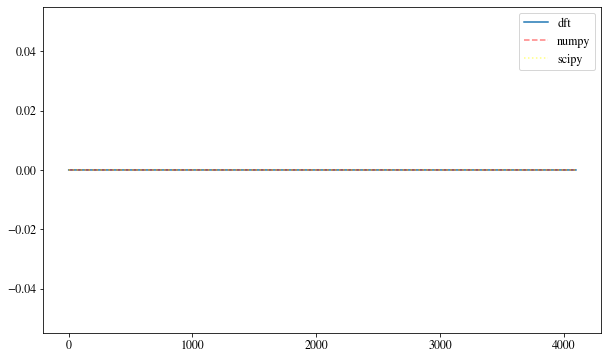

In [85]:
# np.shape(Auto_C_dft)
plt.figure(figsize=(10,6))
plt.plot(ACS_dft[1]/2, label="dft")
# plt.plot(ACS_dft[1]/2 - ACS_nft/2, label="nft")
# plt.plot(ACS_nft/2, label="nft")
plt.plot(ACS_np, linestyle="--",color="red", alpha=0.5, label="numpy")
plt.plot(ACS_scipy, linestyle=":",color="yellow", alpha=0.5, label="scipy")
# plt.xlim(3500,5100)
plt.legend()
# plt.xlim(-100,100)

7.1

In [60]:
data=np.load('mixed_plus.npy')
data1=np.load('mixed_minus.npy')

In [61]:
v_sample=62.5
del_t=1/(v_sample)
time=np.arange(16000)*del_t/(1e6)
x=np.fft.fftfreq(16000,del_t)
x_new=np.fft.fftshift(x)
x_new

array([-31.25      , -31.24609375, -31.2421875 , ...,  31.23828125,
        31.2421875 ,  31.24609375])

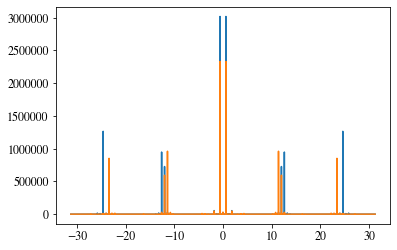

In [62]:
Power=np.abs(np.fft.fft(data[0,0,:]/2**15))**2
Power1=np.abs(np.fft.fft(data1[0,0,:]/2**15))**2

plt.plot(x_new,np.fft.fftshift(Power))
plt.plot(x_new,np.fft.fftshift(Power1))

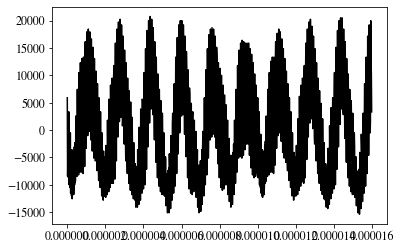

In [63]:
plt.plot(time[:1000],data[0,0,:1000],'black')